# 逆関数法とは
指数関数に従うコードを逆関数法を用いて生成する．

逆関数法とは累積分布関数の逆関数を用いて標準一様分布に従う関数から，目的の分布関数に従う乱数を生成する方法である．

## 指数関数での例
以下のような指数分布を考えよう
$$f(x) = \lambda e^{-\lambda x}$$
累積分布関数は以下の通り．

$$F(x) = \int_{-\infty}^{x}\lambda e^{-\lambda t}dt= 1-e^{-\lambda x}$$

よって，累積分布関数の逆関数は次の通り．
$$F^{-1}(x)= -\frac{1}{\lambda} \log(1-x)$$

In [2]:
import random
import math

lam = 2
unif_random = random.uniform(0,1)

sisuu_random = f=-(1/lam)*math.log((1-unif_random))

## 確認
実際に確認してみよう．
ここでは以下のようにしている
- N個の指数分布に従う乱数を生成する
- DIF = 0.1刻みでその個数を数え，割合を求める
- matplotlibで出力

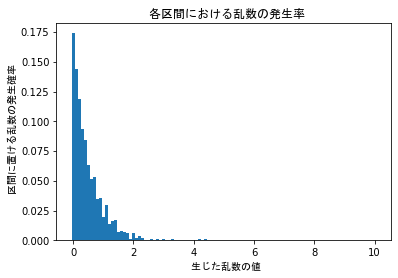

In [36]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

def exponential(lam):
    unif_random = random.uniform(0,1)
    sisuu_random = -(1/lam)*math.log((1-unif_random))
    return sisuu_random

random_numbers = np.array([])#乱数を格納する配列
y_label = np.array([]) # 横軸のラベル
density=np.array([])   # 確率密度を格納する配列

lam = 2
N = 1000 # サンプル数

for i in range(N):
    exp_random = exponential(2)
    random_numbers = np.append(random_numbers, [exp_random])

DIF = 0.1
k = 0
while(k<=10-DIF):
    y_label = np.append(y_label,[k])
    density = np.append(density,[(np.count_nonzero((k<=x)&(x<k+DIF)))/N])# ある範囲の標本値の個数の個数の数え上げ
    k += DIF
    
y_label = np.append(y_label,[10])
density=np.append(density,[np.count_nonzero((10<=x))/N])# 10 以上の値の個数を算出する

plt.bar(y_label,density,width=DIF)
plt.title(" 各区間における乱数の発生率",fontname="MS Gothic")
plt.xlabel(" 生じた乱数の値",fontname="MS Gothic")
plt.ylabel(" 区間に置ける乱数の発生確率",fontname="MS Gothic")
plt.savefig("test2.png",format="png",dpi=300)

plt.show()


分散や期待値を考えることで定量的にも比較してみよう．指数分布の期待値，および分散は次の通りである．
$$E(x) = \frac{1}{\lambda}$$
$$V(x) = \frac{1}{\lambda^2}$$

In [37]:
print(f"逆関数法による値の平均:{random_numbers.mean()}")
print(f"指数分布の平均(理論値):{1/lam}")
print(f"逆関数法による値の分散:{random_numbers.var()}")
print(f"指数分布の分散(理論値):{1/lam**2}")

逆関数法による値の平均:0.5193272134711071
指数分布の平均(理論値):0.5
逆関数法による値の分散:0.27380350868055614
指数分布の分散(理論値):0.25


### 大数の法則の検証
乱数生成個数が増えると理論値に近づくのか，乱数生成個数とその平均値(期待値)の関係についても見てみよう．

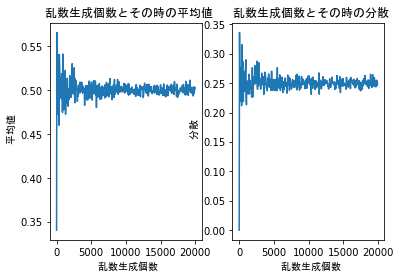

In [38]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

averages = np.array([])
variances = np.array([])
y_labels = np.array([])

numbers = np.array([])

lam = 2

def exponential(lam):
    unif_random = random.uniform(0,1)
    sisuu_random = -(1/lam)*math.log((1-unif_random))
    return sisuu_random

MAX = 20000

for i in range(1,MAX+1,50):
    x = np.array([])
    numbers = np.append(numbers,[i])
    for j in range(i):
        exp_random = exponential(lam)
        x = np.append(x, [exp_random])
    averages = np.append(averages,[x.mean()])
    variances = np.append(variances,[x.var()])
    y_labels = np.append(y_labels,[i])
plt.subplot(1,2,1)
plt.title(" 乱数生成個数とその時の平均値",fontname="MS Gothic")
plt.xlabel(" 乱数生成個数",fontname="MS Gothic")
plt.ylabel(" 平均値",fontname="MS Gothic")
plt.plot(numbers,averages)

plt.subplot(1,2,2)
plt.title(" 乱数生成個数とその時の分散",fontname="MS Gothic")
plt.xlabel(" 乱数生成個数",fontname="MS Gothic")
plt.ylabel(" 分散",fontname="MS Gothic")
plt.plot(numbers,variances)
#plt.savefig("test4.png",format="png",dpi=300)
plt.show()


## パレート分布
逆関数法を同様にパレート分布においても考えてみよう．パレート分布はべき乗測度に従う分布の代表例．
ネットワークの研究やインターネットの研究でよく使われる．

確率密度関数と累積分布関数は，正の数a,bを用いて以下の式で表せる．

$$f(x) = \frac{a b^a}{x^{a+1}}$$
$$F(x) = 1 - \left(\frac{b}{x}\right)^a$$

逆関数は，指数分布の場合と同様に考えると以下のようになる．
$$F^{-1}(x) = b \left(1-x\right)^{-\frac{1}{a}}$$

## 指数分布の場合同様に検証してみよう

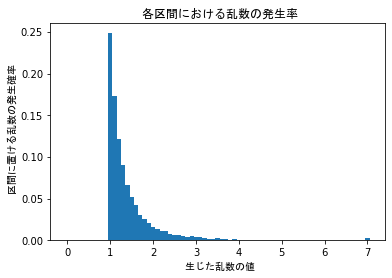

In [46]:

import random
import math
import numpy as np
import matplotlib.pyplot as plt
random_numbers=np.array([])
y_labels=np.array([])
density=np.array([])
a=3
b=1
N=20000

for i in range(N):
    u=random.uniform(0,1)# 一様分布に従う乱数生成
    f=pow((1-u),-1/a)*b# 逆関数法を用いたパレート分布にしたがう乱数生成．
    random_numbers=np.append(random_numbers,[f])# 発生した指数を入れる．
    


DIF=0.1 # 個数の集計する間隔
k=0

UPMAX = 7

while(k<=UPMAX):
    y_labels=np.append(y_labels,[k])
    density=np.append(density,[(np.count_nonzero((k<=x)&(x<k+DIF)))/N])# ある範囲の標本値の個数の個数の数え上げ
    k+=DIF
y_labels=np.append(y_labels,[UPMAX])
density=np.append(density,[np.count_nonzero((UPMAX<=x))/N])

plt.bar(y_labels,density,width=0.10)
plt.title(" 各区間における乱数の発生率",fontname="MS Gothic")
plt.xlabel(" 生じた乱数の値",fontname="MS Gothic")
plt.ylabel(" 区間に置ける乱数の発生確率",fontname="MS Gothic")
plt.savefig("test3.png",format="png",dpi=300)
plt.show()

平均と分散はそれぞれ次の通り
$$E(x) = \frac{a b}{a-1}$$
$$V(x) = \frac{ab^2}{(a-1)^2(a-2)}$$

In [20]:
print(f"逆関数法による値の平均:{x.mean()}")
print(f"パレート分布の平均(理論値):{a*b/(a-1)}")
print(f"逆関数法による値の分散:{x.var()}")
print(f"パレート分布の分散(理論値):{a*b**2/((a-1)**2*(a-2))}")

逆関数法による値の平均:1.4940291934197965
パレート分布の平均(理論値):1.5
逆関数法による値の分散:0.6844982399114259
パレート分布の分散(理論値):0.75


## 大数の法則の確認

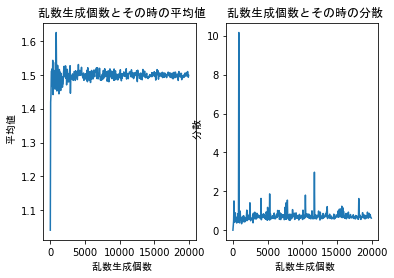

In [51]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

averages = np.array([])
variances = np.array([])

numbers = np.array([])

a=3
b=1
#パレート分布

def pareto(a,b):
    u =  random.uniform(0,1)
    pareto_random = pow((1-u),-1/a)*b# 逆関数法を用いたパレート分布にしたがう乱数生成
    return pareto_random

MAX = 20000

for i in range(1,MAX+1,50):
    x = np.array([])
    numbers = np.append(numbers,[i])
    for j in range(i):
        pareto_random = pareto(a,b)
        x = np.append(x, [pareto_random])
    averages = np.append(averages,[x.mean()])
    variances = np.append(variances,[x.var()])
   
plt.subplot(1,2,1)
plt.title(" 乱数生成個数とその時の平均値",fontname="MS Gothic")
plt.xlabel(" 乱数生成個数",fontname="MS Gothic")
plt.ylabel(" 平均値",fontname="MS Gothic")
plt.plot(numbers,averages)

plt.subplot(1,2,2)
plt.title(" 乱数生成個数とその時の分散",fontname="MS Gothic")
plt.xlabel(" 乱数生成個数",fontname="MS Gothic")
plt.ylabel(" 分散",fontname="MS Gothic")
plt.plot(numbers,variances)
#plt.savefig("test4.png",format="png",dpi=300)
plt.show()